# Deterministic vs Stochastic estimator comparison on the test set

The purpose of this experiment is to measure how the **validation accuracy** changes accross a single model trained with different values of **alpha**.

It will solely examine the models' classification performance and not their masking performance.

Following the reasoning we did when examining the runtime logs:

> For the stochastic case, we'll consider the *Straight-Through v1* and *Slope-Annealing (rate=0.1)* estimators, since we saw that those two performed the best. For a fair comparison we'll examine only the vanilla (i.e. fully-trained) deterministic estimator.

In [1]:
import sys
sys.path.append('..')

from utils.plotting import *

%matplotlib inline

First, we'll load the models of all three families, along with the baseline.

In [2]:
# Baseline
baseline_loc = '../results/cifar10/seeker/default/baseline.txt'
with open(baseline_loc) as f:
    baseline = float(f.read())
print('Baseline accuracy: {:.2f}%'.format(baseline * 100))

# Deterministic
result_dir = '../results/cifar10/hns/deterministic/full_training_10/'
det = read_results(result_dir)

# ST1
result_dir = '../results/cifar10/hns/stochastic/st1/full_training_10/'
st1 = read_results(result_dir)

# SA (Rate=0.1)
result_dir = '../results/cifar10/hns/stochastic/sa/rate_0.1/full_training_10/'
sa = read_results(result_dir)

Baseline accuracy: 65.37%


## Mean comparison

This will compare the averges of the 10 models in each family.

Text(0.5, 1.0, 'Deterministic vs Stochastic average model comparison')

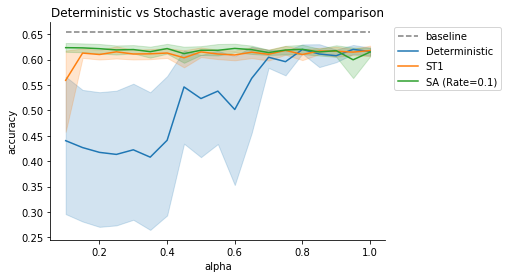

In [3]:
plot_average_results(det, baseline=baseline, label='Deterministic')
plot_average_results(st1, label='ST1')
plot_average_results(sa, label='SA (Rate=0.1)')

plt.title('Deterministic vs Stochastic average model comparison')

Clearly the deterministic models perform much worse than both stochastic ones. Evidently, both in terms of peak performance and variance, the deterministic models are inferior

## Best comparison

This will compare the best model out of the 10 models in each family.

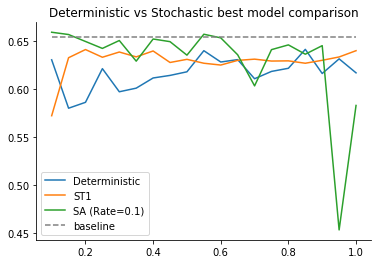

In [4]:
best_det_idx = det.groupby('experiment')['accuracy'].sum().idxmax()
best_st1_idx = st1.groupby('experiment')['accuracy'].sum().idxmax()
best_sa_idx = sa.groupby('experiment')['accuracy'].sum().idxmax()

best_det = det[det['experiment'] == best_det_idx]
best_st1 = st1[st1['experiment'] == best_st1_idx]
best_sa = sa[sa['experiment'] == best_sa_idx]

plt.plot(best_det['alpha'], best_det['accuracy'], label='Deterministic')
plt.plot(best_st1['alpha'], best_st1['accuracy'], label='ST1')
plt.plot(best_sa['alpha'], best_sa['accuracy'], label='SA (Rate=0.1)')

plt.plot(alphas, [baseline] * 19, label='baseline', c='0.5', ls='--')

plt.legend()

plt.title('Deterministic vs Stochastic best model comparison')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Interestingly, the best deterministic model isn't that far behind the two stochastic ones in terms of peak performance.

## Discussion

### Definitions

> - There are two factors that come into play: **performance** (i.e. how high the accuracy was for a certain model) and **variance** (i.e. if we repeat the experiment how likely are we to expect the same performance.)
> - There are two types of variance we observed here. Variance of a single model for different values of alpha and the variance for training the same model more than once. When we use the term *variance* we'll refer to **both** types.
> - We want a model to have **high performance** (i.e. high accuracy) and **low variance** (i.e. few fluctuations in performance).
> - The performance of a trained seeker, on its own, will be referred to as the **baseline** performance. Obviously, because we are hiding information, the models aren't able to surpass this performance. It will serve as the upper limit for our experiments.
> - There are two extreme states that the model can get *locked* into, which provide suboptimal solutions:
> 
>     - The model doesn't hide anything, but classifies correctly.
>     - The model hides everything, but classifies randomly.
> 
>     These states will be referred to as **collapses**.

### Observations

- The stochastic models proved supperior to the deterministic ones in both terms classification performance and lower variance.
- There isn't much evidence to prefer one over the other.

### Conclusions

- Models that employ stochastic thresholding achieve a **better performance**, while maintaining **lower variance** and **collapsing fewer times**.